In [15]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [16]:
base = pd.read_csv('./data/ObesityDataSet_raw_and_data_sinthetic.csv')

base_df = pd.DataFrame(base)
base_df.rename({'NObeyesdad': 'target'}, axis=1, inplace=True)
base_df.describe()
base_df.head()
base_df.shape

(2111, 17)

In [17]:
base_df['mbi'] = base_df['Weight'] / (base_df['Height'] ** 2)
base_df['mbi']

0       24.386526
1       24.238227
2       23.765432
3       26.851852
4       28.342381
          ...    
2106    44.901475
2107    43.741923
2108    43.543817
2109    44.071535
2110    44.144338
Name: mbi, Length: 2111, dtype: float64

# A Compreender a base

In [18]:
base_df.duplicated().sum()

24

In [19]:
base_df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
target                            0
mbi                               0
dtype: int64

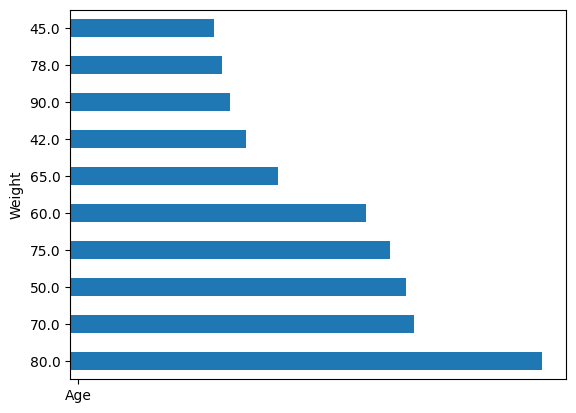

In [20]:
base_df.boxplot(column=['Age'])
plt.grid(False)
plt.show()

In [21]:
max(base_df['Weight'].value_counts().index)
(base_df['Weight'] > 160).sum()

4

In [22]:
base_df[['Weight', 'Height', 'mbi', 'Age']].corr()

,Weight,Height,mbi,Age
Weight,1.000000,0.463136,0.934806,0.202560
Height,0.463136,1.000000,0.131785,-0.025958
mbi,0.934806,0.131785,1.000000,0.244163
Age,0.202560,-0.025958,0.244163,1.000000


In [23]:
base_df['Weight'].value_counts() \
    .head(10) \
    .plot(kind='barh')

<Axes: ylabel='Weight'>

# A continuar

In [24]:
base_df = base_df.loc[~base_df.duplicated()]

In [25]:
## Nominal (One Hot Encoding)
nominal_columns = ['MTRANS']
obesity_df = pd.get_dummies(base_df, prefix=nominal_columns, columns=nominal_columns, dtype=int)
# nominal_columns_names = obesity_df.columns.to_list()

## Ordinal (Ordinal Encoding)
ordinal_columns = ['CAEC', 'CALC']
caec_options = ['no', 'Sometimes', 'Frequently', 'Always']
calc_options = ['no', 'Sometimes', 'Frequently', 'Always']
ordinal_encode = OrdinalEncoder(categories=[caec_options, calc_options])
obesity_df[ordinal_columns] = ordinal_encode.fit_transform(obesity_df[ordinal_columns])

## Label (Label Encoding)
label_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
label_encode = OrdinalEncoder()
obesity_df[label_columns] = label_encode.fit_transform(obesity_df[label_columns])

obesity_df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,FAF,TUE,CALC,target,mbi,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.0,21.000000,1.620000,64.000000,1.0,0.0,2.0,3.0,1.0,0.0,...,0.000000,1.000000,0.0,Normal_Weight,24.386526,0,0,0,1,0
1,0.0,21.000000,1.520000,56.000000,1.0,0.0,3.0,3.0,1.0,1.0,...,3.000000,0.000000,1.0,Normal_Weight,24.238227,0,0,0,1,0
2,1.0,23.000000,1.800000,77.000000,1.0,0.0,2.0,3.0,1.0,0.0,...,2.000000,1.000000,2.0,Normal_Weight,23.765432,0,0,0,1,0
3,1.0,27.000000,1.800000,87.000000,0.0,0.0,3.0,3.0,1.0,0.0,...,2.000000,0.000000,2.0,Overweight_Level_I,26.851852,0,0,0,0,1
4,1.0,22.000000,1.780000,89.800000,0.0,0.0,2.0,1.0,1.0,0.0,...,0.000000,0.000000,1.0,Overweight_Level_II,28.342381,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0.0,20.976842,1.710730,131.408528,1.0,1.0,3.0,3.0,1.0,0.0,...,1.676269,0.906247,1.0,Obesity_Type_III,44.901475,0,0,0,1,0
2107,0.0,21.982942,1.748584,133.742943,1.0,1.0,3.0,3.0,1.0,0.0,...,1.341390,0.599270,1.0,Obesity_Type_III,43.741923,0,0,0,1,0
2108,0.0,22.524036,1.752206,133.689352,1.0,1.0,3.0,3.0,1.0,0.0,...,1.414209,0.646288,1.0,Obesity_Type_III,43.543817,0,0,0,1,0
2109,0.0,24.361936,1.739450,133.346641,1.0,1.0,3.0,3.0,1.0,0.0,...,1.139107,0.586035,1.0,Obesity_Type_III,44.071535,0,0,0,1,0


In [26]:
# X = obesity_df.drop(columns=['target',
#                              'MTRANS_Automobile','MTRANS_Bike','MTRANS_Motorbike',
#                              'MTRANS_Public_Transportation','MTRANS_Walking'], axis=1)

# X = obesity_df.drop(columns=['target', 'MTRANS_Bike', 'MTRANS_Walking'], axis=1) # k=1 86%

# X = obesity_df.drop(columns=['target','MTRANS_Automobile','MTRANS_Motorbike','MTRANS_Public_Transportation',], axis=1) # k=1 84%

# X = obesity_df.drop(columns=['target', 'SMOKE', 'family_history_with_overweight'], axis=1) # k=3 84% (0.2 test)

# X = obesity_df.drop(columns=['target', 'Age', 'family_history_with_overweight'], axis=1) # 

X = obesity_df.drop(columns=['target', 'Gender'], axis=1)
y = base_df['target']

X_min_max = MinMaxScaler().fit_transform(X)
X_not_norm = X.to_numpy()
X_zscore = zscore(X).to_numpy()

# X_zscore
# pd.DataFrame(X_norm, columns=X.columns.to_list())
# X

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_zscore, y, test_size=0.3, random_state=333)

results = []
for i in range(1, 27, 2):
    knn_obesity = KNeighborsClassifier(n_neighbors=i)
    knn_obesity.fit(X_train, y_train)
    results.append(
        [i, accuracy_score(y_test, knn_obesity.predict(X_test))]
    )

accuracy_df = pd.DataFrame(results, columns=['K', 'Accuracy'])
accuracy_df

,K,Accuracy
0,1,0.843700
1,3,0.821372
2,5,0.830941
3,7,0.826156
4,9,0.802233
5,11,0.794258
6,13,0.783094
7,15,0.768740
8,17,0.773525
9,19,0.765550
